

---


**Neural Networks and Deep Learning**

**Project 1**

---



Amirmohammad Khosravi  -  810198386

Adib Rezaee  -  810198401

---


#Question 1

Mcculloch & Pitts Network

In [22]:
# x[0] = x1 , x[1] = x0 , x[2] = In
def MPN(x):
  threshold = 2
  y = [0, 0, 0]
  y[0] = (2 * x[0]) + (2 * x[1]) + ((-1) * x[2])
  y[1] = (2 * x[0]) + (2 * x[2])
  y[2] = (2 * x[0]) + (1 * x[1]) + ((-1) * x[2])

  y1 = int(y[0] >= threshold)
  y0 = int(y[1] >= threshold)
  Acc = int(y[2] >= threshold) 
  return [y1, y0, Acc]

In [23]:
def printResult(inputs, outputs):
  print("x1\tx0\tIn\t|\ty1\ty0\tAcc")
  for i in range(len(inputs)):
    print(inputs[i][0], "\t", inputs[i][1], "\t", inputs[i][2], "\t|\t", 
          outputs[i][0], "\t", outputs[i][1], "\t", outputs[i][2])

In [24]:
inputs = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
          [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]

outputs = []

for i in inputs:
  outputs.append(MPN(i))

In [25]:
printResult(inputs, outputs)

x1	x0	In	|	y1	y0	Acc
0 	 0 	 0 	|	 0 	 0 	 0
0 	 0 	 1 	|	 0 	 1 	 0
0 	 1 	 0 	|	 1 	 0 	 0
0 	 1 	 1 	|	 0 	 1 	 0
1 	 0 	 0 	|	 1 	 1 	 1
1 	 0 	 1 	|	 0 	 1 	 0
1 	 1 	 0 	|	 1 	 1 	 1
1 	 1 	 1 	|	 1 	 1 	 1


#Question 2

##AdaLine

###Part 1

In [ ]:
!gdown 1vLE893-Uk31EnHWCON43uLhMSudpFxPa
!unzip HW1.zip

Downloading...
From: https://drive.google.com/uc?id=1vLE893-Uk31EnHWCON43uLhMSudpFxPa
To: /content/HW1.zip
100% 1.36M/1.36M [00:00<00:00, 130MB/s]
Archive:  HW1.zip
   creating: Q2_Dataset/
  inflating: Q2_Dataset/MadaLine.csv  
   creating: Q3_Article/
  inflating: Q3_Article/liu2017.pdf  
   creating: Q4_Dataset/
  inflating: Q4_Dataset/CarPrice_Assignment.csv  


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

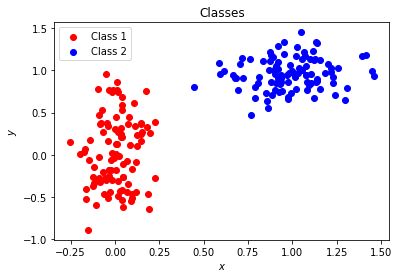

In [ ]:
np.random.seed(0)
x1 = np.random.normal(0, 0.1, 100)
y1 = np.random.normal(0, 0.4, 100)

x2 = np.random.normal(1, 0.2, 100)
y2 = np.random.normal(1, 0.2, 100)

t1 = -np.ones((1, 100))
t2 = np.ones((1, 100))

plt.scatter(x1, y1, label='Class 1', color='red')
plt.scatter(x2, y2, label='Class 2', color='blue')
plt.legend(loc='upper left')
plt.title('Classes')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.show()

###Part 2

In [ ]:
class Adaline:
    def __init__(self, w, b, learning_rate):
        self.w = w
        self.b = b
        self.learning_rate = learning_rate

    def net(self, x):
        return self.w@x + self.b

    def f(self, net):
        return 1 if net >= 0. else -1.

    def update(self, x, net, t):
        for i in range(t.shape[1]):
            self.w = self.w + self.learning_rate * (t[0, i] - net[0, i]) * x[:, i]
            self.b = self.b + self.learning_rate * (t[0, i] - net[0, i])
    
    def error(self,net,t):
      return ((t-net)**2).sum()/2

In [ ]:
def plot_adaline(model, x1, y1, x2, y2, errors, xlim=None, ylim=None):
    x = np.arange(xlim[0], xlim[1], 0.05)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(x1, y1, label='Class #1', color='red')
    plt.scatter(x2, y2, label='Class #2', color='blue')
    plt.plot(x, (-model.w[0, 0]*x-model.b)/model.w[0, 1], color='black')
    plt.legend(loc='upper left')
    plt.title('Classes')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    if ylim:
        plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)
    plt.subplot(1, 2, 2)
    plt.plot(errors)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.grid()
    plt.show()

In [ ]:
def train_adaline(x1, y1, x2, y2, t1, t2, threshold=8.5):
    model = Adaline(
        w=np.random.randn(1,2), 
        b=np.random.randint(1, 5), 
        learning_rate=0.001
    )
    error = np.infty
    errors = []

    while len(errors) < 3 or errors[-2] - errors[-1] > 0.1:
        net = model.net(np.vstack((x1, y1)))
        model.update(np.vstack((x1, y1)), net, t1)
        error = model.error(net, t1)

        net = model.net(np.vstack((x2, y2)))
        model.update(np.vstack((x2, y2)), net, t2)
        
        error += model.error(net, t2)
        errors.append(error)
    return model, errors

In [ ]:
model, errors = train_adaline(x1, y1, x2, y2, t1, t2)

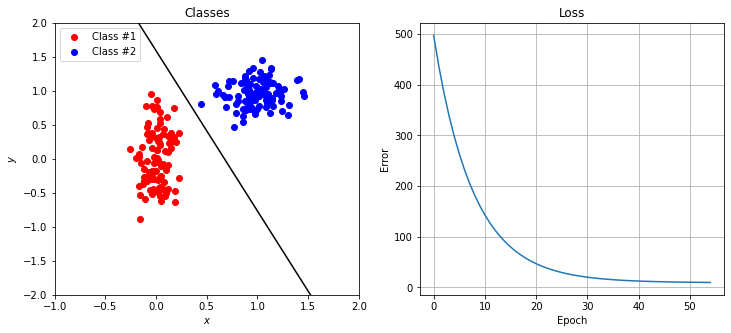

In [ ]:
plot_adaline(model, x1, y1, x2, y2, errors, xlim=[-1., 2.], ylim=[-2., 2.])

### Part 3

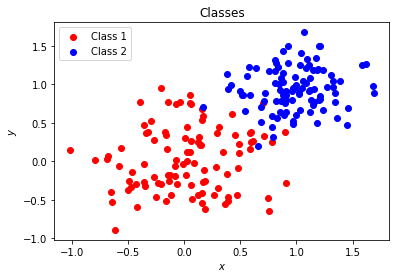

In [ ]:
np.random.seed(0)
x1 = np.random.normal(0, 0.4, 100)
y1 = np.random.normal(0, 0.4, 100)

x2 = np.random.normal(1, 0.3, 100)
y2 = np.random.normal(1, 0.3, 100)

t1 = -np.ones((1, 100))
t2 = np.ones((1, 100))

plt.scatter(x1, y1, label='Class 1', color='red')
plt.scatter(x2, y2, label='Class 2', color='blue')
plt.legend(loc='upper left')
plt.title('Classes')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.show()

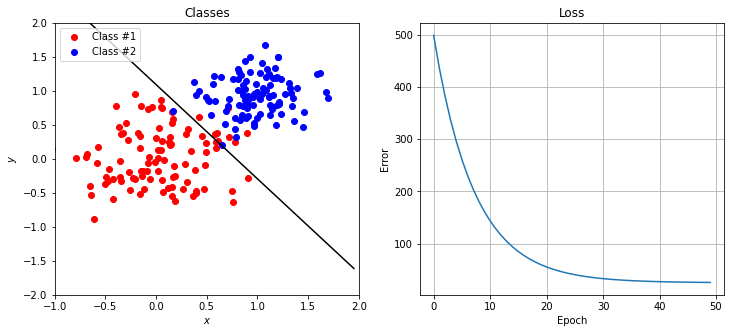

In [ ]:
model, errors = train_adaline(x1, y1, x2, y2, t1, t2)
plot_adaline(model, x1, y1, x2, y2, errors, xlim=[-1., 2.], ylim=[-2., 2.])

## Madaline

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv('/content/Q2_Dataset/MadaLine.csv', names=['x', 'y', 't'])
df['t'] = df['t'].replace({0: -1.})

In [ ]:
df.head()

,x,y,t
0,-0.642823,0.720606,-1.0
1,-0.218126,0.677263,-1.0
2,-0.582930,-0.347496,-1.0
3,0.285127,0.091750,-1.0
4,-0.335577,-0.313893,-1.0


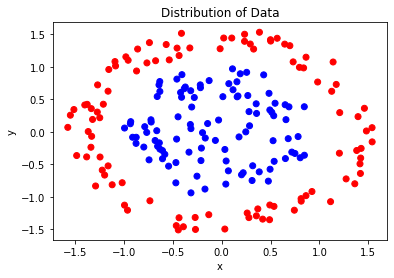

In [ ]:
plt.scatter(df['x'], df['y'], c=df['t'], cmap='bwr')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribution of Data')
plt.show()

##MadaLine

In [ ]:
class Madaline:
    def __init__(self, n, lr=0.9):
        self.n = n
        self.z_in = 0
        self.y = 0
        self.err = 0
        np.random.seed(0)
        self.w = np.random.random([n, 2])
        self.b = np.random.random([n, 1])
        self.w2 = np.array([1./self.n]*self.n)
        self.b2 = np.array([(self.n-1.)/self.n])
        self.learning_rate = lr

    def net(self, x):
        self.z_in = self.w@x + self.b
        z  = self.f(self.z_in)
        y_in  = self.w2@z + self.b2
        self.y = self.f(y_in)
        return self.y
    
    def f(self, net):
        return np.where(net >= 0, 1., -1.)

    def update(self, x, t):
        for i in range(t.shape[1]):
            if t[0, i] != self.y[i]: 
                if t[0, i] == 1: 
                    min_index = np.argmin(np.abs(self.z_in[:, i]))
                    self.w[min_index, :] = self.w[min_index, :] + self.learning_rate * (1. - self.z_in[min_index, i]) * x[:, i]
                    self.b[min_index, :] = self.b[min_index, :] + self.learning_rate * (1. - self.z_in[min_index, i])
                else:                
                    for unit in range(self.n):
                        if self.z_in[unit, i] > 0:
                            self.w[unit, :] = self.w[unit, :] + self.learning_rate * (-1. - self.z_in[unit, i]) * x[:, i]
                            self.b[unit, :] = self.b[unit, :] + self.learning_rate * (-1. - self.z_in[unit, i])
            self.net(x)              

    def error(self, net, t):
      self.err = ((t-net)**2).sum()/2.
      return self.err

In [ ]:
def plot_madaline(model, errors, df, n):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    

    x = np.arange(-2, 2, 0.05)
    y = np.arange(-5, 5, 0.05)
    xx, yy = np.meshgrid(x, y)
    Z = model.net((np.c_[xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.5)
    for i in range(model.n):
        plt.plot(x, (-model.w[i, 0]*x-model.b[i, 0])/model.w[i, 1], color='gray')
    plt.scatter(df['x'], df['y'], c=df['t'], cmap='bwr')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim([-3, 3])
    plt.title('Data Dist n='+str(n))

    plt.subplot(1, 2, 2)
    plt.plot(errors)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.grid()
    plt.show()

    plt.show()

In [ ]:
def train_madaline(n, df, error_threshold, lr=0.9):
    model = Madaline(n, lr)
    errors = []
    t = df['t'].to_numpy().reshape((1, len(df)))
    pairs = np.vstack((df['x'], df['y']))
    pairs = shuffle(pairs, random_state=0)
    t = shuffle(t, random_state=0)
    error = np.inf

    epochs_elapsed = 0 
    while error > error_threshold and epochs_elapsed < 200:
        net = model.net(pairs)
        model.update(pairs, t)
        error = model.error(model.net(pairs), t)
        errors.append(error)
        epochs_elapsed += 1

    return model, errors

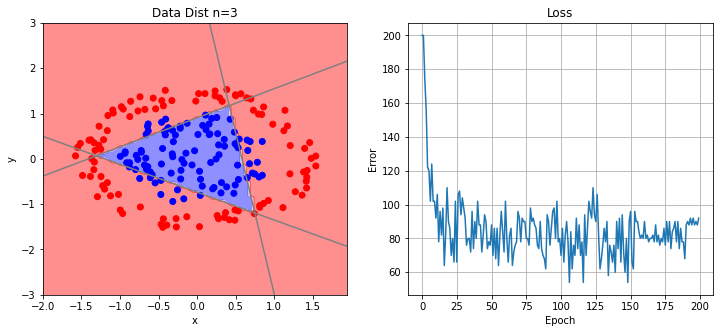

In [ ]:
model, errors = train_madaline(3, df, 45)
plot_madaline(model, errors, df, 3)

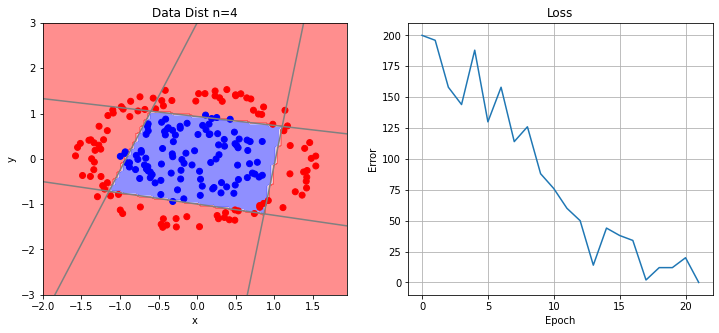

In [ ]:
model, errors = train_madaline(4, df, 0)
plot_madaline(model, errors, df, 4)

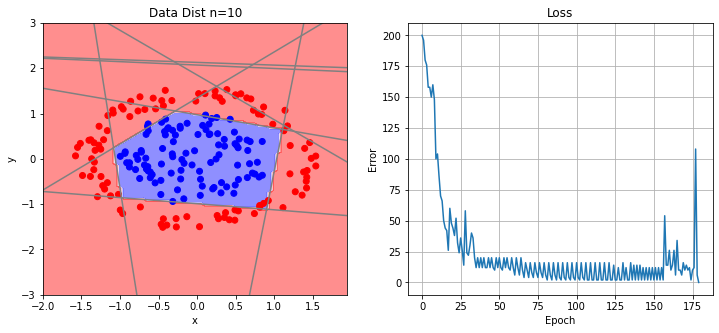

In [ ]:
model, errors = train_madaline(n=8, df=df, error_threshold=0, lr=0.5)
plot_madaline(model, errors, df, 10)

#Question 3

##Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import torchvision
from keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
import keras
from keras import layers
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import ELU, PReLU, LeakyReLU
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
torchvision.datasets.MNIST

torchvision.datasets.mnist.MNIST

Loading mnist dataset:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Ploting labels frequency for train set:


<AxesSubplot:xlabel='label', ylabel='count'>

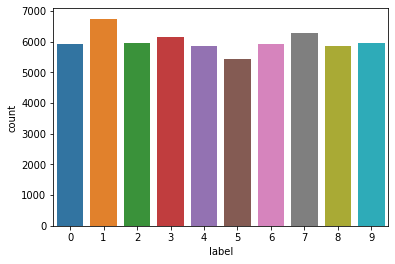

In [ ]:
label_counts = pd.DataFrame(Counter(train_labels).items(), columns = ['label', 'count'])
sns.barplot(data = label_counts, x = 'label', y = 'count')

Showing 5 samples of train set:

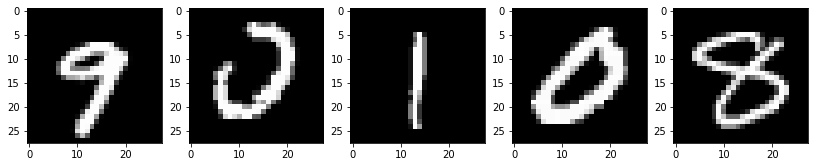

In [ ]:
f, axs = plt.subplots(1, 5, figsize=(14,5), sharex=False, sharey=False,)
for i in range(5):
    axs[i].imshow(train_images[random.randint(0, len(train_images))].reshape(28,28), cmap='gray')

Normalizing Data:

In [ ]:
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

Reshaping images:

In [ ]:
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
print(train_images.shape, test_images.shape)

(60000, 784) (10000, 784)


##Auto-Encoder Network:

  Encoder's and Decoder's architecture:

    



In [ ]:
input_layer_size = 784

encode_layer1_size = 500
encode_layer2_size = 300
encode_layer3_size = 100

code_layer_size = 30

decode_layer1_size = 100
decode_layer2_size = 300
decode_layer3_size = 500

output_layer_size = 784

Initializing Auto-Encoder:

Input Layer:

In [ ]:
input_layer = keras.Input(shape=(input_layer_size,))

Hidden Layers:

In [ ]:
encode_activation = 'relu'
decode_activation = 'sigmoid'

encoded_layer1 = layers.Dense(encode_layer1_size, activation=encode_activation, name='endoded_layer1')(input_layer)
encoded_layer2 = layers.Dense(encode_layer2_size, activation=encode_activation, name='endoded_layer2')(encoded_layer1)
encoded_layer3 = layers.Dense(encode_layer3_size, activation=encode_activation, name='endoded_layer3')(encoded_layer2)

coded_layer = layers.Dense(code_layer_size, activation=encode_activation, name='coded_layer')(encoded_layer3)

decoded_layer1 = layers.Dense(decode_layer1_size, activation=decode_activation, name='dedoded_layer1')(coded_layer)
decoded_layer2 = layers.Dense(decode_layer2_size, activation=decode_activation, name='dedoded_layer2')(decoded_layer1)
decoded_layer3 = layers.Dense(decode_layer3_size, activation=decode_activation, name='dedoded_layer3')(decoded_layer2)

Output Layer:

In [ ]:
output_layer = layers.Dense(output_layer_size, name='output_layer')(decoded_layer3)

The Model:

In [ ]:
autoencoder = keras.Model(input_layer, output_layer)

Compiling Auto-Encoder:

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 endoded_layer1 (Dense)      (None, 500)               392500    
                                                                 
 endoded_layer2 (Dense)      (None, 300)               150300    
                                                                 
 endoded_layer3 (Dense)      (None, 100)               30100     
                                                                 
 coded_layer (Dense)         (None, 30)                3030      
                                                                 
 dedoded_layer1 (Dense)      (None, 100)               3100      
                                                                 
 dedoded_layer2 (Dense)      (None, 300)               30300 

Training Auto-Encoder:

In [ ]:
epochs = 50
batch_size = 256

history = autoencoder.fit(train_images, train_images,
                epochs=epochs, batch_size=batch_size, shuffle=True,
                validation_data=(test_images, test_images))

Epoch 1/50
235/235 [==============================] - 14s 52ms/step - loss: 0.0648 - val_loss: 0.0530
Epoch 2/50
235/235 [==============================] - 12s 51ms/step - loss: 0.0474 - val_loss: 0.0425
Epoch 3/50
235/235 [==============================] - 12s 53ms/step - loss: 0.0385 - val_loss: 0.0347
Epoch 4/50
235/235 [==============================] - 14s 58ms/step - loss: 0.0324 - val_loss: 0.0298
Epoch 5/50
235/235 [==============================] - 12s 52ms/step - loss: 0.0285 - val_loss: 0.0269
Epoch 6/50
235/235 [==============================] - 13s 55ms/step - loss: 0.0258 - val_loss: 0.0243
Epoch 7/50
235/235 [==============================] - 12s 52ms/step - loss: 0.0237 - val_loss: 0.0225
Epoch 8/50
235/235 [==============================] - 14s 58ms/step - loss: 0.0220 - val_loss: 0.0209
Epoch 9/50
235/235 [==============================] - 12s 51ms/step - loss: 0.0205 - val_loss: 0.0195
Epoch 10/50
235/235 [==============================] - 12s 50ms/step - loss: 0.019

Showing loss and validation loss plots:

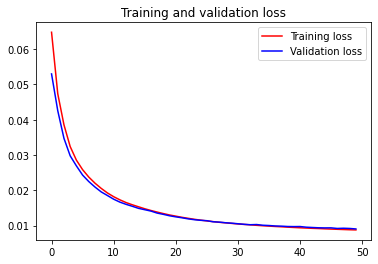

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs_r = range(epochs)
plt.figure()
plt.plot(epochs_r, loss, 'red', label='Training loss')
plt.plot(epochs_r, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.close()

Testing train and test sets with our Auto-Encoder model:

In [ ]:
train_images_output = autoencoder.predict(train_images)
test_images_output = autoencoder.predict(test_images)

313/313 [==============================] - 2s 7ms/step


Showing some random input images and their corresponding Auto-Encoder outputs:

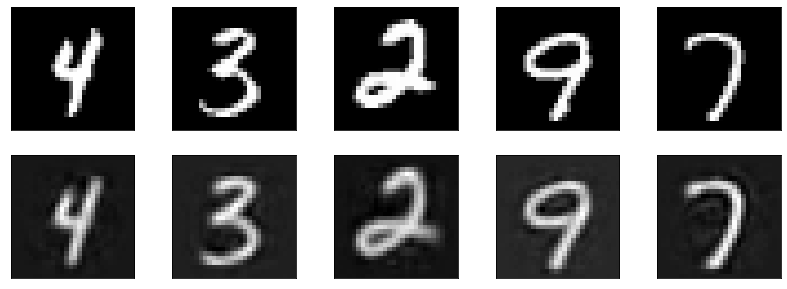

In [ ]:
sample_count = 5
plt.figure(figsize=(14, 5))
for i in range(sample_count):
    ax = plt.subplot(2, sample_count, i + 1)
    random_index = random.randint(0, len(test_images))
    plt.imshow(test_images[random_index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, sample_count, i + 1 + sample_count)
    plt.imshow(test_images_output[random_index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##Classifier Network

Seperating Encoder from Auto-Encoder:

In [ ]:
encoder = keras.Model(input_layer, coded_layer)

Predicting using Encoder part:

In [ ]:
train_images_coded = encoder.predict(train_images)
test_images_coded = encoder.predict(test_images)

313/313 [==============================] - 1s 3ms/step


Converting labeling to one-hot format:

In [ ]:
train_Y_one_hot = to_categorical(train_labels)
test_Y_one_hot = to_categorical(test_labels)

print('Original label:', train_labels[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Spliting training set to train and validation:

In [ ]:
train_X, valid_X, train_label, valid_label = train_test_split(train_images_coded, train_Y_one_hot, test_size=0.2, random_state=13)

Shape of train and validation sets:

In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 30), (12000, 30), (48000, 10), (12000, 10))

We train a Sequential model with 64 batches and 20 epochs:

In [ ]:
c_batch_size = 64
c_epochs = 20
classes_count = 10

Training Classifier model:

In [ ]:
classifier = Sequential()
classifier.add(layers.Dense(40, activation='relu', name="hidden_layer1"))
classifier.add(layers.Dense(20, activation='relu', name="hidden_layer2"))
classifier.add(layers.Dense(classes_count, activation='softmax', name="output_layer"))

Calssifier model summary:

In [ ]:
classifier.build((None, 30))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 40)                1240      
                                                                 
 hidden_layer2 (Dense)       (None, 20)                820       
                                                                 
 output_layer (Dense)        (None, 10)                210       
                                                                 
Total params: 2,270
Trainable params: 2,270
Non-trainable params: 0
_________________________________________________________________


Compiling Calssifier model:

In [ ]:
classifier.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

Training Classifier model:

In [ ]:
mnist_train = classifier.fit(train_X, train_label, batch_size=c_batch_size, epochs=c_epochs, verbose=1, validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.8525 - accuracy: 0.7329 - val_loss: 0.3462 - val_accuracy: 0.8933
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2953 - accuracy: 0.9105 - val_loss: 0.2651 - val_accuracy: 0.9171
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2454 - accuracy: 0.9254 - val_loss: 0.2259 - val_accuracy: 0.9315
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2180 - accuracy: 0.9344 - val_loss: 0.2157 - val_accuracy: 0.9325
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1981 - accuracy: 0.9400 - val_loss: 0.1980 - val_accuracy: 0.9405
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1813 - accuracy: 0.9456 - val_loss: 0.1853 - val_accuracy: 0.9438
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1712 - accuracy: 0.9486 - val_loss: 0.1790 - val_accuracy: 0.9448
Epoch 

Evaluating model on test set:

In [ ]:
test_eval = classifier.evaluate(test_images_coded, test_Y_one_hot, verbose=0)
print(test_eval)

[0.12895271182060242, 0.9614999890327454]


Showing Accuracy, validation Accuracy, Loss and Validation Loss in two plots:

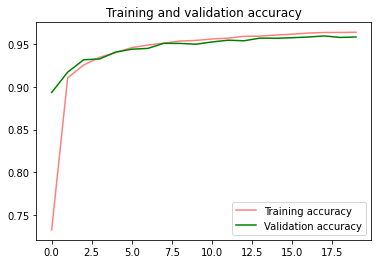

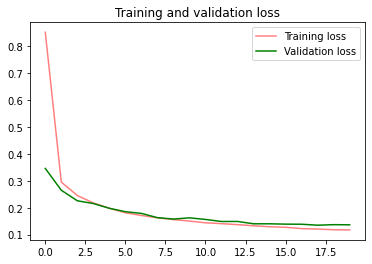

In [ ]:
accuracy = mnist_train.history['accuracy']
val_accuracy = mnist_train.history['val_accuracy']
loss = mnist_train.history['loss']
val_loss = mnist_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'red', label='Training accuracy', alpha = 0.5)
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'red', label='Training loss', alpha = 0.5)
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Showing Confusion Matrix:

313/313 [==============================] - 1s 2ms/step


<Figure size 576x576 with 0 Axes>

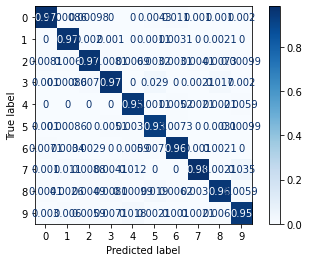

In [ ]:
y_prediction = classifier.predict(test_images_coded)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(test_Y_one_hot, axis=1)
cm = confusion_matrix(y_test, y_prediction , normalize='pred')
labels = range(0, 10)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

plt.figure(figsize=(8,8))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# from sklearn.metrics.plot_confusion_matrix import plot_confusion_matrix
# fig, ax = plt.subplots(figsize=(15, 15))
# plot_confusion_matrix(classifier, test_images_coded, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
# plt.show()

#Question 4

##Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt;
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from keras.callbacks import EarlyStopping

Reading dataset:

In [ ]:
cars_df = pd.read_csv('/content/Q4_Dataset/CarPrice_Assignment.csv')

Dataset info:

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cars_df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Extractin company name from car name:

In [ ]:
cars_df.iloc[58]

car_ID                       59
symboling                     3
CarName             mazda glc 4
fueltype                    gas
aspiration                  std
doornumber                  two
carbody               hatchback
drivewheel                  rwd
enginelocation            front
wheelbase                  95.3
carlength                 169.0
carwidth                   65.7
carheight                  49.6
curbweight                 2500
enginetype                rotor
cylindernumber              two
enginesize                   80
fuelsystem                 mpfi
boreratio                  3.33
stroke                    3.255
compressionratio            9.4
horsepower                  135
peakrpm                    6000
citympg                      16
highwaympg                   23
price                   15645.0
Name: 58, dtype: object

In [ ]:
new_cars_df = cars_df.copy()
new_cars_df[['CompanyName', 'CarName']] = cars_df['CarName'].str.split(' ', 1, expand=True)
new_cars_df.iloc[58]

car_ID                     59
symboling                   3
CarName                 glc 4
fueltype                  gas
aspiration                std
doornumber                two
carbody             hatchback
drivewheel                rwd
enginelocation          front
wheelbase                95.3
carlength               169.0
carwidth                 65.7
carheight                49.6
curbweight               2500
enginetype              rotor
cylindernumber            two
enginesize                 80
fuelsystem               mpfi
boreratio                3.33
stroke                  3.255
compressionratio          9.4
horsepower                135
peakrpm                  6000
citympg                    16
highwaympg                 23
price                 15645.0
CompanyName             mazda
Name: 58, dtype: object

Deleting CarName, car_ID and symboling columns:

In [ ]:
new_cars_df.drop(['CarName', 'car_ID', 'symboling'], axis=1, inplace=True)

In [ ]:
new_cars_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Finding wrong company names:

In [ ]:
set(new_cars_df['CompanyName'])

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw'}

As we can see we have these wrong words:

    maxda, porcshce, toyouta, volkswagen
They have to be replaced with:

    mazda, porsche, toyota, volkswagen




Now we replace them:

In [ ]:
new_cars_df.replace({'CompanyName' : { 'maxda' : 'mazda', 
                                      'porcshce' : 'porsche', 
                                      'toyouta' : 'toyota', 
                                      'vokswagen' : 'volkswagen' }}, inplace = True)
set(new_cars_df['CompanyName'])

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo',
 'vw'}

Convert cathegorical data to numerical data:

In [ ]:
new_cars_df = pd.get_dummies(new_cars_df)
new_cars_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,CompanyName_vw
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


Drawing correlation matrix:

Text(0.5, 1.0, 'Correlation Matrix')

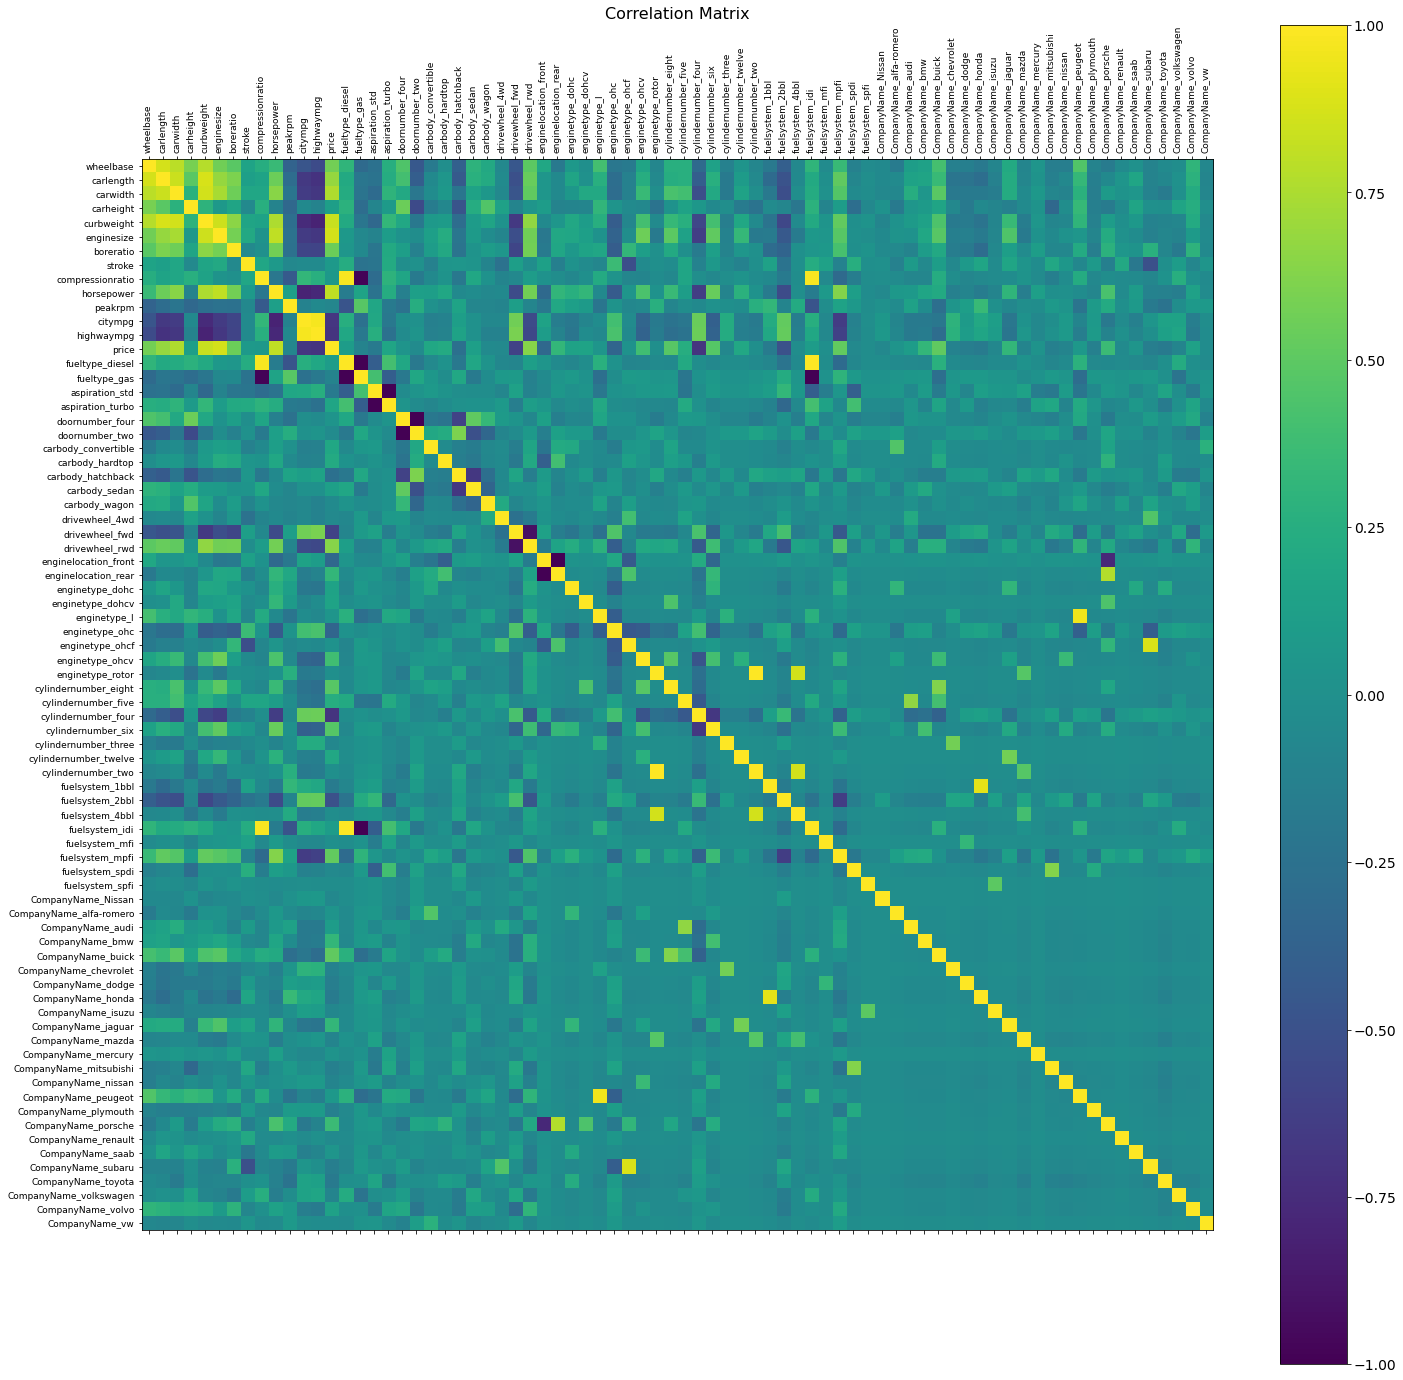

In [ ]:
f = plt.figure(figsize=(24, 24))
plt.matshow(new_cars_df.corr(), fignum=f.number)
plt.xticks(range(new_cars_df.select_dtypes(['number']).shape[1]), new_cars_df.select_dtypes(['number']).columns, fontsize=9, rotation=90)
plt.yticks(range(new_cars_df.select_dtypes(['number']).shape[1]), new_cars_df.select_dtypes(['number']).columns, fontsize=9)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

We see that **enginesize** is the most correlated among other features.

In [ ]:
new_cars_df.corr().price.sort_values(ascending=False)

price                  1.000000
enginesize             0.874145
curbweight             0.835305
horsepower             0.808139
carwidth               0.759325
                         ...   
fuelsystem_2bbl       -0.501374
drivewheel_fwd        -0.601950
citympg               -0.685751
highwaympg            -0.697599
cylindernumber_four   -0.697762
Name: price, Length: 76, dtype: float64

In [ ]:
df = new_cars_df

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


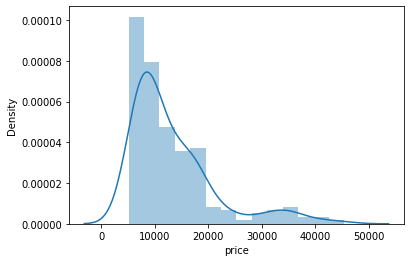

In [ ]:
sns.distplot(df['price'], hist=True, label='Price') # Using Seaborn
plt.show()

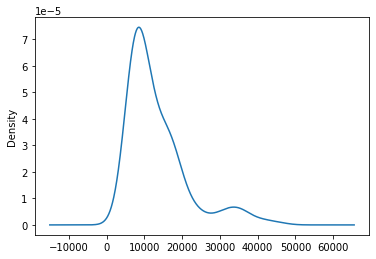

In [ ]:
# Kernel Density Estimation
df['price'].plot(kind='kde') # Using Pandas
plt.show()

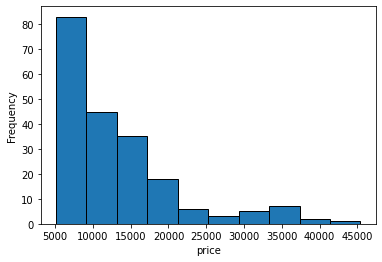

In [ ]:
# naive approach
df['price'].plot(kind='hist', edgecolor='black')
plt.xlabel('price')
plt.show()

Plotting price based on engine size. We see that they have a good correlation

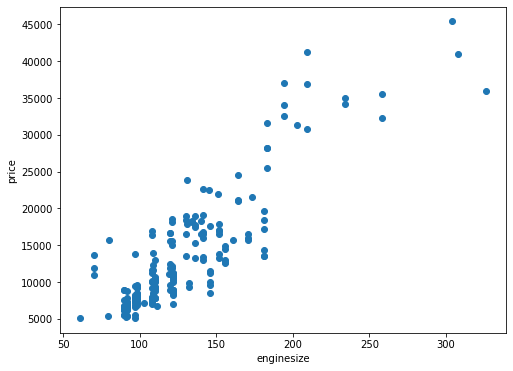

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['enginesize'], df['price'])
plt.xlabel('enginesize')
plt.ylabel('price')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.15, random_state=100)

In [ ]:
type(y_train), type(y_test)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
y_train, y_test = np.array(y_train), np.array(y_test)

In [ ]:
x_scaler = MinMaxScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.transform(x_test)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((174, 75), (31, 75), (174,), (31,))

##Multi-Layer Perceptron - Part 2

In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow_addons.metrics import RSquare

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(EPOCHS), history.history['loss'], label='loss')
    plt.plot(range(EPOCHS), history.history['val_loss'], label='val_loss')
    plt.title('Loss and validation loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('R2 Score')
    plt.plot(range(EPOCHS), history.history['coeff_determination'], label='r2_score')
    plt.plot(range(EPOCHS), history.history['val_coeff_determination'], label='val_r2_score')
    plt.legend()
    plt.show()

MLP with one layer

In [ ]:
# hyper parameters

HIDDEN_LAYER_SIZE = 512
EPOCHS = 1000
BATCH_SIZE = 32

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
from keras import backend as K

# R2
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
#model with one layer

model = Sequential()

model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu', input_shape=(75,)))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mse', metrics=(coeff_determination,))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               38912     
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 39,425
Trainable params: 39,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/1000
5/5 [==============================] - 1s 52ms/step - loss: 241177040.0000 - coeff_determination: -2.5433 - val_loss: 206530704.0000 - val_coeff_determination: -4.2521
Epoch 2/1000
5/5 [==============================] - 0s 9ms/step - loss: 241141904.0000 - coeff_determination: -3.7038 - val_loss: 206494128.0000 - val_coeff_determination: -4.2512
Epoch 3/1000
5/5 [==============================] - 0s 9ms/step - loss: 241103056.0000 - coeff_determination: -3.4283 - val_loss: 206451952.0000 - val_coeff_determination: -4.2502
Epoch 4/1000
5/5 [==============================] - 0s 14ms/step - loss: 241057184.0000 - coeff_determination: -3.1828 - val_loss: 206401328.0000 - val_coeff_determination: -4.2491
Epoch 5/1000
5/5 [==============================] - 0s 8ms/step - loss: 241002912.0000 - coeff_determination: -2.9610 - val_loss: 206340864.0000 - val_coeff_determination: -4.2477
Epoch 6/1000
5/5 [==============================] - 0s 9ms/step - loss: 240935504.0000 - coeff_det

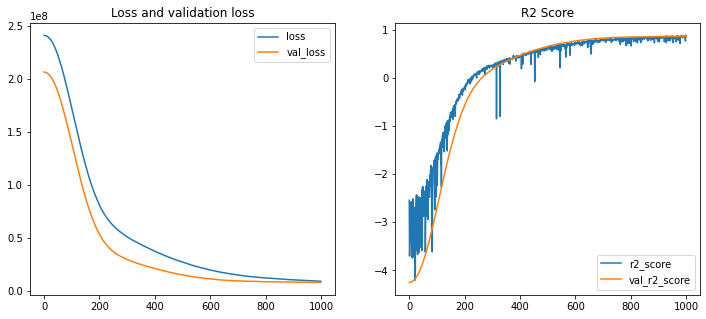

In [ ]:
plot_history(history)

In [ ]:
#model with two layer

model = Sequential()

model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu', input_shape=(75,)))
model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mse', metrics=(coeff_determination,))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               38912     
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 1)                 513       
                                                                 
Total params: 302,081
Trainable params: 302,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/1000
5/5 [==============================] - 1s 46ms/step - loss: 241166544.0000 - coeff_determination: -3.1242 - val_loss: 206475328.0000 - val_coeff_determination: -4.2508
Epoch 2/1000
5/5 [==============================] - 0s 14ms/step - loss: 241049088.0000 - coeff_determination: -2.7352 - val_loss: 206302688.0000 - val_coeff_determination: -4.2469
Epoch 3/1000
5/5 [==============================] - 0s 17ms/step - loss: 240828832.0000 - coeff_determination: -3.0308 - val_loss: 205977152.0000 - val_coeff_determination: -4.2395
Epoch 4/1000
5/5 [==============================] - 0s 17ms/step - loss: 240435632.0000 - coeff_determination: -3.9146 - val_loss: 205418000.0000 - val_coeff_determination: -4.2267
Epoch 5/1000
5/5 [==============================] - 0s 13ms/step - loss: 239731264.0000 - coeff_determination: -4.2997 - val_loss: 204516688.0000 - val_coeff_determination: -4.2062
Epoch 6/1000
5/5 [==============================] - 0s 14ms/step - loss: 238656032.0000 - coeff

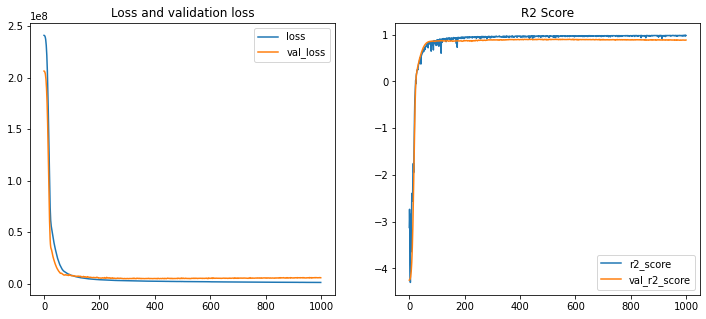

In [ ]:
plot_history(history)

In [ ]:
#model with three layer

model = Sequential()

model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu', input_shape=(75,)))
model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu'))
model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mse', metrics=(coeff_determination,))
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 512)               38912     
                                                                 
 dense_80 (Dense)            (None, 512)               262656    
                                                                 
 dense_81 (Dense)            (None, 512)               262656    
                                                                 
 dense_82 (Dense)            (None, 1)                 513       
                                                                 
Total params: 564,737
Trainable params: 564,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/1000
5/5 [==============================] - 1s 45ms/step - loss: 241155152.0000 - coeff_determination: -2.5899 - val_loss: 206411184.0000 - val_coeff_determination: -4.2494
Epoch 2/1000
5/5 [==============================] - 0s 17ms/step - loss: 240878960.0000 - coeff_determination: -2.9513 - val_loss: 205808640.0000 - val_coeff_determination: -4.2359
Epoch 3/1000
5/5 [==============================] - 0s 16ms/step - loss: 239893632.0000 - coeff_determination: -2.8079 - val_loss: 204044544.0000 - val_coeff_determination: -4.1962
Epoch 4/1000
5/5 [==============================] - 0s 18ms/step - loss: 237333936.0000 - coeff_determination: -3.2777 - val_loss: 199779680.0000 - val_coeff_determination: -4.1000
Epoch 5/1000
5/5 [==============================] - 0s 19ms/step - loss: 231540736.0000 - coeff_determination: -2.9036 - val_loss: 190786864.0000 - val_coeff_determination: -3.8965
Epoch 6/1000
5/5 [==============================] - 0s 21ms/step - loss: 220146448.0000 - coeff

In [ ]:
y_pred = model.predict(x_test)
for i in range(5):
    print(f'y_pred: {y_pred[i]}, y_test: {y_test[i]}')

1/1 [==============================] - 0s 28ms/step
y_pred: [8796.101], y_test: 7738.0
y_pred: [8757.019], y_test: 8495.0
y_pred: [10646.815], y_test: 8845.0
y_pred: [9370.099], y_test: 9298.0
y_pred: [7260.964], y_test: 7603.0


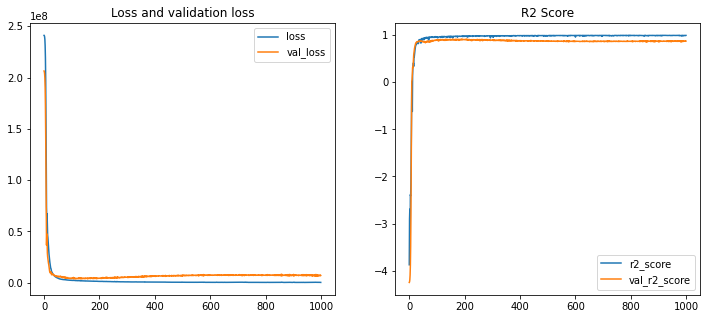

In [ ]:
plot_history(history)

Epoch 1/1000
5/5 [==============================] - 1s 49ms/step - loss: 13116.8027 - coeff_determination: -2.6935 - val_loss: 12750.7051 - val_coeff_determination: -4.2485
Epoch 2/1000
5/5 [==============================] - 0s 20ms/step - loss: 13104.3584 - coeff_determination: -8.2111 - val_loss: 12722.3262 - val_coeff_determination: -4.2321
Epoch 3/1000
5/5 [==============================] - 0s 16ms/step - loss: 13062.0752 - coeff_determination: -2.9498 - val_loss: 12640.7510 - val_coeff_determination: -4.1848
Epoch 4/1000
5/5 [==============================] - 0s 20ms/step - loss: 12949.8242 - coeff_determination: -2.7313 - val_loss: 12445.4512 - val_coeff_determination: -4.0721
Epoch 5/1000
5/5 [==============================] - 0s 17ms/step - loss: 12694.9756 - coeff_determination: -2.4185 - val_loss: 12030.6074 - val_coeff_determination: -3.8370
Epoch 6/1000
5/5 [==============================] - 0s 16ms/step - loss: 12171.2217 - coeff_determination: -2.9377 - val_loss: 11225.55

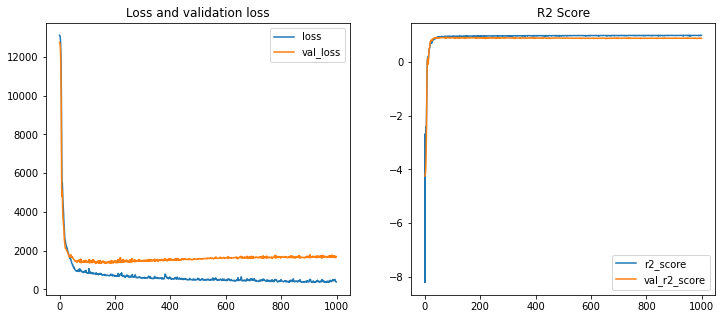

In [ ]:
model = Sequential()

model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu', input_shape=(75,)))
model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu'))
model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mae', metrics=(coeff_determination,))
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)
plot_history(history)

Epoch 1/1000
5/5 [==============================] - 1s 86ms/step - loss: 241188544.0000 - coeff_determination: -3.2650 - val_loss: 206561376.0000 - val_coeff_determination: -4.2528
Epoch 2/1000
5/5 [==============================] - 0s 29ms/step - loss: 241185120.0000 - coeff_determination: -2.9924 - val_loss: 206557808.0000 - val_coeff_determination: -4.2527
Epoch 3/1000
5/5 [==============================] - 0s 26ms/step - loss: 241181376.0000 - coeff_determination: -2.5606 - val_loss: 206553968.0000 - val_coeff_determination: -4.2526
Epoch 4/1000
5/5 [==============================] - 0s 25ms/step - loss: 241177376.0000 - coeff_determination: -2.6640 - val_loss: 206549904.0000 - val_coeff_determination: -4.2525
Epoch 5/1000
5/5 [==============================] - 0s 22ms/step - loss: 241173104.0000 - coeff_determination: -2.8885 - val_loss: 206545408.0000 - val_coeff_determination: -4.2524
Epoch 6/1000
5/5 [==============================] - 0s 24ms/step - loss: 241168304.0000 - coeff

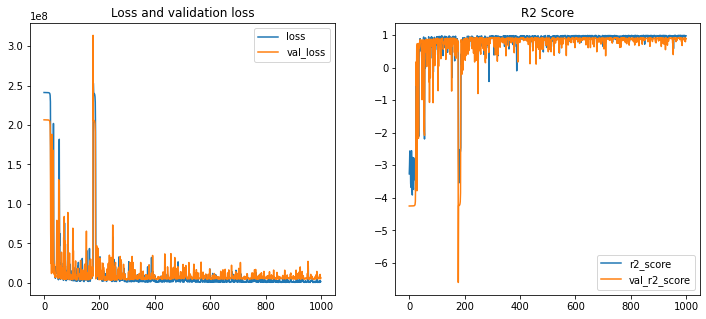

In [ ]:

model = Sequential()

model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu', input_shape=(75,)))
model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu'))
model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0000001), loss='mse', metrics=(coeff_determination,))
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)
plot_history(history)

Epoch 1/1000
5/5 [==============================] - 1s 46ms/step - loss: 13118.6816 - coeff_determination: -2.5240 - val_loss: 12758.3164 - val_coeff_determination: -4.2529
Epoch 2/1000
5/5 [==============================] - 0s 17ms/step - loss: 13118.6738 - coeff_determination: -2.7438 - val_loss: 12758.2910 - val_coeff_determination: -4.2529
Epoch 3/1000
5/5 [==============================] - 0s 19ms/step - loss: 13118.6367 - coeff_determination: -3.4084 - val_loss: 12758.1943 - val_coeff_determination: -4.2529
Epoch 4/1000
5/5 [==============================] - 0s 20ms/step - loss: 13118.5176 - coeff_determination: -2.9031 - val_loss: 12758.0430 - val_coeff_determination: -4.2528
Epoch 5/1000
5/5 [==============================] - 0s 18ms/step - loss: 13118.3623 - coeff_determination: -2.7400 - val_loss: 12757.8896 - val_coeff_determination: -4.2527
Epoch 6/1000
5/5 [==============================] - 0s 17ms/step - loss: 13118.2051 - coeff_determination: -2.8265 - val_loss: 12757.72

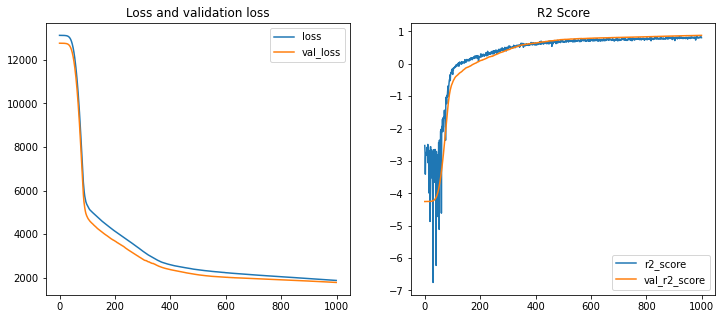

In [ ]:
model = Sequential()

model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu', input_shape=(75,)))
model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu'))
model.add(Dense(HIDDEN_LAYER_SIZE, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer=tf.keras.optimizers.Adagrad(), loss='mae', metrics=(coeff_determination,))
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)
plot_history(history)